
# Intro to Hidden Markov Models
In this notebook, you'll use the Pomegranate library to build a simple Hidden Markov Model and explore the Pomegranate API.

The following image show the process which we will model as a HMM
<img src="model_overview.png" width="500">

==> If we convert the image to a transition and emission matrix, the following matrices are the result
Transition matrix

<img src="transitions_matrix.png" width="500">
Emission matrix

<img src="emission_matrix.png" width="500">

Now the question is what is the most likely weather if we have the following observations?<br>
['H', 'H', 'G','G','G','H']

In [1]:
# Jupyter "magic methods" -- only need to be run once per kernel restart
%load_ext autoreload
%autoreload 1
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML
from IPython.display import display, HTML
from helper_functions import create_graph,create_hidden_MarkovModel,preddict_viterbi

#####start_p_dict#####
{'sunny': 0.6666666666666666, 'rainy': 0.3333333333333333}
#####e_df#####
  sunny rainy
H   0.8   0.4
G   0.2   0.6
#####q_df#####
      sunny rainy
sunny   0.8   0.2
rainy   0.4   0.6
sunny  ,  sunny :  0.8
sunny  ,  rainy :  0.2
rainy  ,  sunny :  0.4
rainy  ,  rainy :  0.6
sunny  ,  H :  0.8
sunny  ,  G :  0.2
rainy  ,  H :  0.4
rainy  ,  G :  0.6


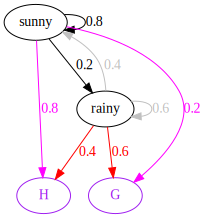

In [3]:
from graphviz import Source

# create state space and initial state probabilities

data_dict={}
states=['sunny',"rainy"]
start_p_dict = {'sunny':2/3, 'rainy':1/3}

data_dict[f"start_p_dict"] = start_p_dict

# create transition matrix
# equals transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states
states=['sunny',"rainy"]
q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.80, 0.2]
q_df.loc[states[1]] = [0.40, 0.6]

### Create emission matrix
hidden_states=["H",'G']
e_df = pd.DataFrame(columns=states, index=hidden_states)
e_df.loc[hidden_states[0]] = [0.80, 0.40]
e_df.loc[hidden_states[1]] = [0.20, 0.60]


data_dict["e_df"] = e_df
data_dict["q_df"] = q_df

for el in data_dict:
    print("#"*5+f'{el}'+"#"*5)
    print(data_dict[el])
       
create_graph(q_df,e_df)
Source.from_file("markov_graph.dot")

After we successfully built your model we can predict the most likely weater sequence for <br>
observation ['H', 'H', 'G','G','G','H']

In [6]:
model = create_hidden_MarkovModel(e_df,q_df,start_p_dict)
observations = ['H', 'H', 'G','G','G','H']
    
preddict_viterbi(model, observations)

sunny  ,  sunny :  0.8
sunny  ,  rainy :  0.2
rainy  ,  sunny :  0.4
rainy  ,  rainy :  0.6
The most likely weather sequence to have generated these observations is ['sunny', 'sunny', 'rainy', 'rainy', 'rainy', 'sunny'] at 0.16987%.


Examples to calculate by yourself


* http://www.blackarbs.com/blog/introduction-hidden-markov-models-python-networkx-sklearn/2/9/2017
* https://medium.com/@Ayra_Lux/hidden-markov-models-part-2-the-decoding-problem-c628ba474e69



In [ ]:
# Exa,

# Solution for example  Ayra_Lux

sunny  ,  sunny :  0.8
sunny  ,  rainy :  0.2
rainy  ,  sunny :  0.4
rainy  ,  rainy :  0.6
sunny  ,  paint :  0.4
sunny  ,  clean :  0.1
sunny  ,  shop :  0.2
sunny  ,  bike :  0.3
rainy  ,  paint :  0.3
rainy  ,  clean :  0.45
rainy  ,  shop :  0.2
rainy  ,  bike :  0.05


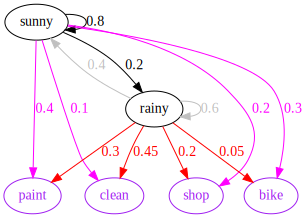

In [10]:
from graphviz import Source

# create state space and initial state probabilities

data_dict={}
states=['sunny',"rainy"]
start_p_dict = {'sunny':0.6, 'rainy':0.4}

data_dict[f"start_p_dict"] = start_p_dict

# create transition matrix
# equals transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states
states=['sunny',"rainy"]
q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.80, 0.2]
q_df.loc[states[1]] = [0.40, 0.6]

### Create emission matrix
hidden_states=["paint",'clean',"shop","bike"]
e_df = pd.DataFrame(columns=states, index=hidden_states)
e_df.loc[hidden_states[0]] = [0.40, 0.30]
e_df.loc[hidden_states[1]] = [0.10, 0.45]
e_df.loc[hidden_states[2]] = [0.20, 0.20]
e_df.loc[hidden_states[3]] = [0.30, 0.05]

create_graph(q_df, e_df)
Source.from_file("markov_graph.dot")



In [9]:
model = create_hidden_MarkovModel(e_df,q_df,start_p_dict)
observations = ['shop', 'clean', 'bike','paint']

    
    
preddict_viterbi(model, observations)

sunny  ,  sunny :  0.8
sunny  ,  rainy :  0.2
rainy  ,  sunny :  0.4
rainy  ,  rainy :  0.6
The most likely weather sequence to have generated these observations is ['rainy', 'rainy', 'sunny', 'sunny'] at 0.08294%.
